# Assessment

### Question 1

Using the taiChiData.csv dataset, study the effect of treatment after 24 weeks. 


#### Question 1.1
Plot a box-and-whisker plot to see the mean difference between 24 weeks and the baseline. Formulate a hypothesis about treatment after 24 weeks. Interpret the results obtained.


In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [150]:
%matplotlib inline

In [151]:
%cd C:\Users\Teboho\Desktop\ALU\DAV\DAV_25_Notebook_Assessment

C:\Users\Teboho\Desktop\ALU\DAV\DAV_25_Notebook_Assessment


In [152]:
data = pd.read_csv('taiChiData.csv', sep=',')

In [153]:
data.head()

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W
0,1,22,1,45.9,13.3,56.25,control,none,57.0,52.0,50.0
1,2,11,1,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0
2,3,36,1,35.5,6.7,59.56,tai chi,hypertension,83.0,68.0,68.0
3,4,1,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0
4,5,9,1,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0


In [154]:
data.dropna(inplace = True)# enter code to drop rows with missing values 
data.drop_duplicates(inplace=True)

In [155]:
treatment1 = data.groupby('treatment').mean()
treatment1

,Unnamed: 0,Id,sex,BMI,duration,age,FIQ_baseline,FIQ_12W,FIQ_24W
treatment,,,,,,,,,
control,22.653846,22.461538,0.846154,34.492308,13.080769,50.290769,66.115385,60.923077,61.730769
tai chi,28.615385,31.923077,0.615385,32.630769,12.361538,48.811538,66.153846,55.923077,55.000000


In [156]:
data['difference'] = data['FIQ_baseline'] - data['FIQ_24W']
data.head()

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W,difference
0,1,22,1,45.9,13.3,56.25,control,none,57.0,52.0,50.0,7.0
1,2,11,1,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0,0.0
2,3,36,1,35.5,6.7,59.56,tai chi,hypertension,83.0,68.0,68.0,15.0
3,4,1,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0,12.0
4,5,9,1,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0,12.0


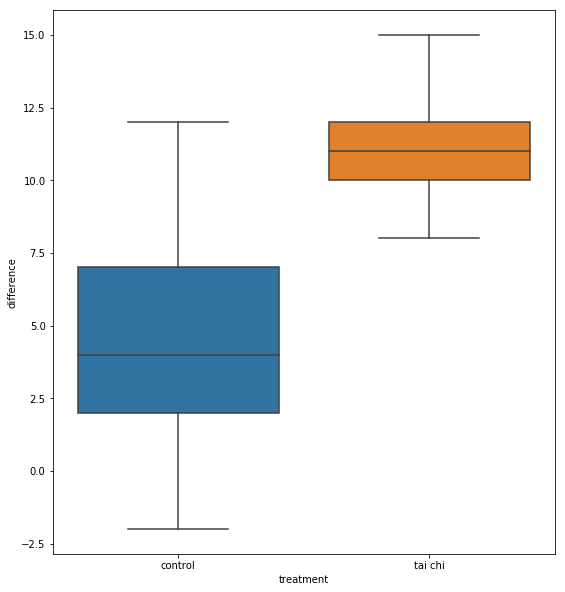

In [157]:
fig, ax = plt.subplots(figsize=(9,10))
sns.boxplot(x='treatment', y='difference', data = data)

The mean difference of the control treatment is significantly lower than the mean difference of the tai chi treatment.
The control mean difference is quite spread out as per the tails of the plot. control group has spread out lower and upper value while
those of the tai chi treatment are quite spread together. The tai chi treatment also seems to have equal distribution of data below and 
above the mean, while the control group, most of the data is above the mean.

Formulating the hypothesis
We are interested in whether there is no difference between the treatment types after 24 weeks of the treatment. We state the null hypothesis as:

𝐻0 :  𝜇𝑑=0  , i.e., the mean difference is zero. There is no difference between control and tai chi results
𝐻1 :  𝜇𝑑≠0 , a two-tail test. There is a difference between control and tai chi results.

In [158]:
treatment = data.groupby(data['treatment'])

In [159]:
Control = list(treatment)[0][1]['FIQ_24W']
Taichi = list(treatment)[1][1]['FIQ_24W']

In [160]:
Control.head()

0    50.0
1    85.0
3    62.0
4    56.0
7    54.0
Name: FIQ_24W, dtype: float64

In [161]:
Taichi.head()

2     68.0
8     49.0
14    58.0
24    74.0
25    57.0
Name: FIQ_24W, dtype: float64

In [162]:
Control.var() #Check for variance in Control treatment

160.7646153846154

In [163]:
Taichi.var() # Check for variance in Taichi treatment

146.66666666666666

The variances are un-equal, hence we cannot use the two-sample t-test with the assumtpion that both dataframes have equal
variances. We need to use the Welsch t-test, where equal_var is set to False

In [164]:
stats.ttest_ind(Control, Taichi, equal_var = False) #Comparing means of Control and Taichi treatments after 24 weeks

Ttest_indResult(statistic=1.6105588724212019, pvalue=0.11976488652807823)

#Intepreting the results of the two-sample t-test

The $p \approx 0.12$. Because the p-value is much higher than the $\alpha = 0.05$, we need to reject the null hypothesis that
there is no difference between the means of the tai chi treatment and the control treatment. The two treatments are not the same. We therefore adopt the alternative hypothesis

#### Question 1.2
Visualize the data for baseline treatment and treatment after 24 weeks.


In [165]:
control  = list(treatment)[0][1]
control

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W,difference
0,1,22,1,45.9,13.3,56.25,control,none,57.0,52.0,50.0,7.0
1,2,11,1,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0,0.0
3,4,1,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0,12.0
4,5,9,1,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0,12.0
7,8,19,1,28.1,11.7,51.72,control,none,60.0,54.0,54.0,6.0
9,10,5,1,31.3,11.4,62.51,control,diabetes,63.0,59.0,61.0,2.0
10,11,4,1,36.9,10.2,57.22,control,hypertension,50.0,46.0,43.0,7.0
12,13,3,1,32.2,14.1,40.47,control,none,82.0,70.0,76.0,6.0
15,16,7,1,31.2,13.4,41.02,control,heart disease,81.0,75.0,71.0,10.0
16,17,39,0,36.9,11.8,47.57,control,diabetes,80.0,76.0,81.0,-1.0


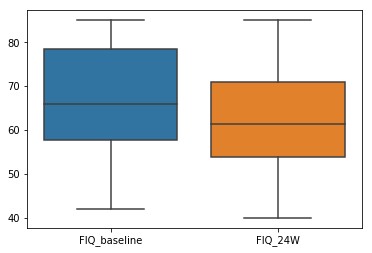

In [166]:
sns.boxplot(data=control.loc[:,['FIQ_baseline','FIQ_24W']])

#### Question 1.3
Formulate an hypothesis about pain severity before and after treatment in 24 weeks.

In [167]:
print(abs(control['FIQ_baseline'].mean() - control['FIQ_24W'].mean()))

4.38461538461538


On average, there is a difference in the pain severity before and after treatment of 4.38. Is this difference significant?

Formulating the hypothesis
We can now state our hypothesis. We are interested in whether there is no difference between the the severity of pain symptoms before the start of the control treatment and after 24 weeks of the control treatment. We state the null hypothesis as:

𝐻0 :  𝜇𝑑=0  , i.e., the mean difference is zero.

𝐻1 :  𝜇𝑑≠0 , a two-tail test. There is a difference attributed to the control treatment.

In [168]:
stats.ttest_rel(control['FIQ_baseline'], 
                control['FIQ_24W'])

Ttest_relResult(statistic=5.659397979375456, pvalue=6.8417665401796045e-06)

#### Question 1.4 
Discuss your results.

Interpreting the results We got a  𝑝≈0.0000068 , which is significantly less than the significance level of  𝛼=0.05 . I therefore reject the null hypothesis. This means the average pain level before the control treatment is significantly less than the pain level after the control treatment

### Question 2

The following is measurement data on the bonding strength of three types of resin. Are there any differences between the resin material? 
<img src='assessImg.PNG'>

Source: [Analysis of variance (ANOVA) comparing means of more than two groups](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3916511/)

The results sugest there is a difference between the resin materials. The $p = 0.001$ which is less than the $\alpha = 0.05$.
The result suggests to reject the null hypothesis that all the group means are the same, and coincidently supports that at least one group mean differs from other group means